In [1]:
#!pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 14 hours 4 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_andyg_vutumg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.897 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [5]:
import pandas as pd

In [6]:
stores_train = pd.read_csv('data/stores_train_preprocessed.csv')

In [7]:
stores_train.isnull().sum()

store_id                        0
grunnkrets_id                   0
lat                             0
lon                             0
chain_name                      0
mall_name                       0
revenue                         0
grunnkrets_population         805
district_population            30
distance_from_busstop           0
busstop_importance_level        0
lv1                             0
lv2                             0
lv3                             0
lv4                             0
households_grunnkrets           0
municipality_name               0
area_km2                       30
district_municipality_name      0
dtype: int64

In [8]:
stores_train['grunnkrets_population'] = (stores_train['grunnkrets_population'].fillna((stores_train.grunnkrets_population.mean())))
stores_train['district_population'] = (stores_train['district_population'].fillna((stores_train.district_population.mean())))
stores_train['area_km2'] = (stores_train['area_km2'].fillna(stores_train.area_km2.mean()))

In [9]:
stores_train.isnull().sum()

store_id                      0
grunnkrets_id                 0
lat                           0
lon                           0
chain_name                    0
mall_name                     0
revenue                       0
grunnkrets_population         0
district_population           0
distance_from_busstop         0
busstop_importance_level      0
lv1                           0
lv2                           0
lv3                           0
lv4                           0
households_grunnkrets         0
municipality_name             0
area_km2                      0
district_municipality_name    0
dtype: int64

In [10]:
stores_train = stores_train[stores_train.revenue > 0.0]

In [11]:
import numpy as np
stores_train['revenue'] = (np.log10(stores_train['revenue']))*10000

In [12]:
data = stores_train

In [13]:
data = data.drop(['store_id','grunnkrets_population','district_population','area_km2','households_grunnkrets'], axis = 1)

In [14]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
train, test = data.split_frame(ratios=[0.8], seed = 655)

In [16]:
model = H2OAutoML(sort_metric='rmsle',
                  seed = 655,
                  max_models = 25,
                  exclude_algos = ['DeepLearning'],
                 )

In [17]:
model.train(training_frame = train, y = 'revenue')

AutoML progress: |█
08:42:50.552: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,5.0483265,0.1600029,5.2854657,5.0989985,4.878167,5.0516524,4.9273477
mean_residual_deviance,103.6639560,16.777706,129.03667,109.04602,85.65177,92.41421,102.17112
mse,103.6639560,16.777706,129.03667,109.04602,85.65177,92.41421,102.17112
null_deviance,496962.06,81646.33,581376.0,541923.75,372870.06,461882.3,526758.25
r2,0.5733489,0.0433339,0.5429800,0.5856400,0.5192241,0.5882152,0.6306853
residual_deviance,210686.34,34960.297,265428.44,224525.75,178755.25,190188.44,194533.81
rmse,10.155594,0.8123048,11.359431,10.442511,9.254824,9.613231,10.107973
rmsle,0.8034166,0.0192456,0.8118613,0.8051902,0.8294736,0.7912036,0.7793544


In [18]:
h2o_models = h2o.automl.get_leaderboard(model, extra_columns = "ALL")
h2o_models

model_id,rmsle,rmse,mse,mae,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_25_20221113_84250,0.79981,10.2063,104.168,5.03372,104.168,702,0.015454,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_25_20221113_84250,0.807096,10.3202,106.506,5.08388,106.506,494,0.015687,StackedEnsemble
GBM_3_AutoML_25_20221113_84250,0.816207,10.2996,106.083,5.11984,106.083,304,0.006184,GBM
DRF_1_AutoML_25_20221113_84250,0.845002,10.7691,115.974,5.4376,115.974,1594,0.010906,DRF
XRT_1_AutoML_25_20221113_84250,0.848642,10.6969,114.424,5.4477,114.424,2538,0.012559,DRF
GBM_1_AutoML_25_20221113_84250,nan,10.765,115.886,5.39785,115.886,512,0.010352,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_7,nan,10.5885,112.115,5.31623,112.115,514,0.006216,GBM
GBM_5_AutoML_25_20221113_84250,nan,10.3848,107.845,5.16528,107.845,237,0.005048,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_4,nan,10.433,108.848,5.24676,108.848,307,0.011183,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_6,nan,10.6222,112.831,5.37026,112.831,572,0.00995,GBM


In [19]:
best_model = model.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_25_20221113_84250

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 58.82772457477635
RMSE: 7.669923374765641
MAE: 3.8806306103712105
RMSLE: 0.6747376063065919
Mean Residual Deviance: 58.82772457477635
R^2: 0.761446878754922
Null degrees of freedom: 10008
Residual degrees of freedom: 10001
Null deviance: 2468254.249538219
Residual deviance: 588806.6952689365
AIC: 69205.1155784838

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 104.16824832029894
RMSE: 10.206284746189425
MAE: 5.0337205703583034
RMSLE: 0.7998104390745924
Mean Residual Deviance: 104.16824832029894
R^2: 0.5737523748649357
Null degrees of freedom: 10164
Residual degrees of freedom: 10156
Null deviance: 2484810.36049423
Residual deviance: 1058870.2441758388
AIC: 76093.68523783464

Cross-Validation Metrics Summary: 
      

In [20]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 81.78857581328948
RMSE: 9.043703655764572
MAE: 4.692025041592833
RMSLE: NaN
Mean Residual Deviance: 81.78857581328948
R^2: 0.6256972401359875
Null degrees of freedom: 2476
Residual degrees of freedom: 2469
Null deviance: 541275.147383299
Residual deviance: 202590.30228951806
AIC: 17956.470263974665

In [21]:
y_pred = model.predict(test)
y_pred

In [22]:
y_truth = test['revenue']
y_truth

In [23]:
#y_pred.types

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_25_20221113_84250,9.0311,81.5607,4.72491,0.773199,81.5607,494,0.013202,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_25_20221113_84250,9.0437,81.7886,4.69203,nan,81.7886,702,0.015573,StackedEnsemble
GBM_3_AutoML_25_20221113_84250,9.06089,82.0997,4.75953,nan,82.0997,304,0.005209,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_8,9.16362,83.9719,4.85828,nan,83.9719,337,0.006216,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_5,9.18274,84.3227,4.87796,nan,84.3227,268,0.006351,GBM
GBM_5_AutoML_25_20221113_84250,9.19886,84.6191,4.85075,nan,84.6191,237,0.004511,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_4,9.20985,84.8213,4.94632,nan,84.8213,307,0.008925,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_9,9.22481,85.0972,4.91811,nan,85.0972,394,0.007486,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_17,9.24427,85.4566,4.97871,0.801943,85.4566,426,0.007555,GBM
GBM_grid_1_AutoML_25_20221113_84250_model_3,9.28686,86.2458,4.94545,nan,86.2458,330,0.007569,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

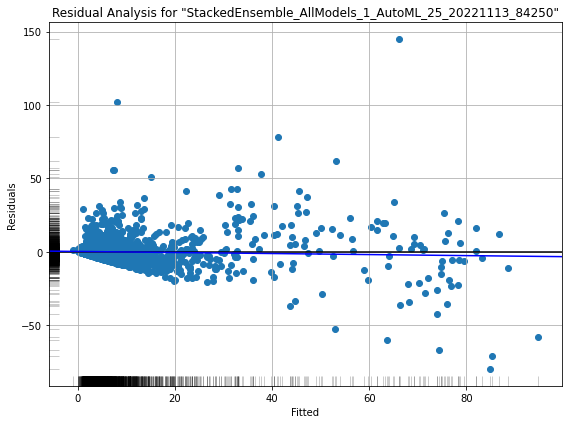

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

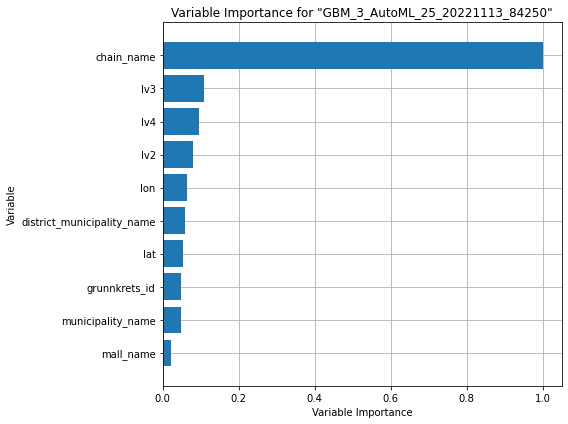

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

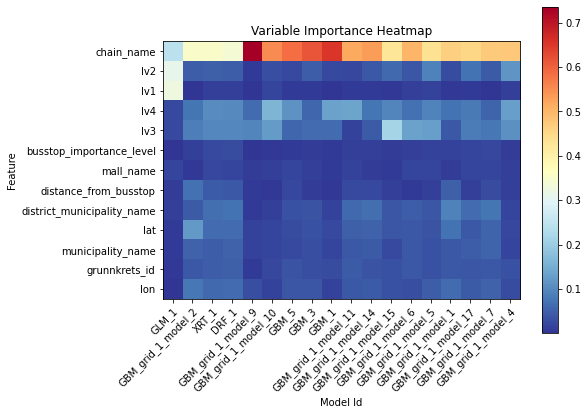

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

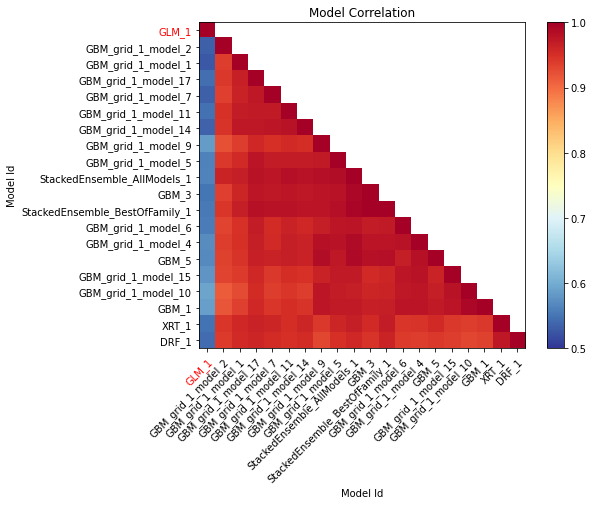

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

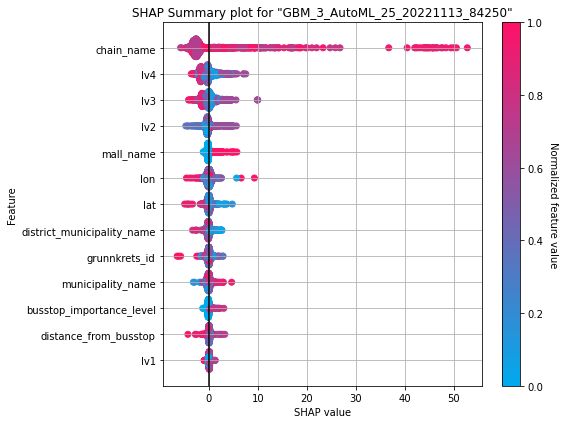

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

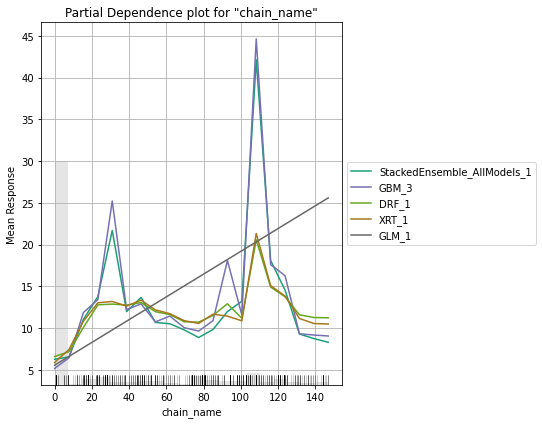

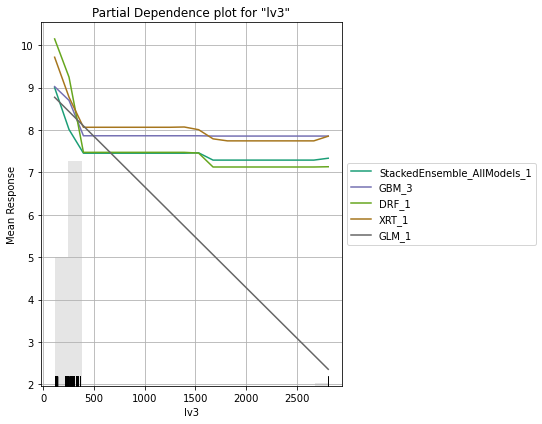

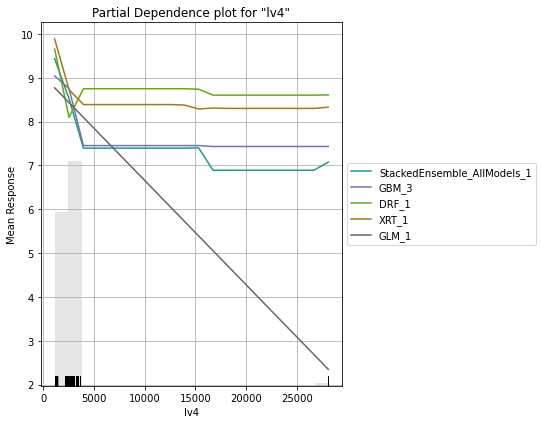

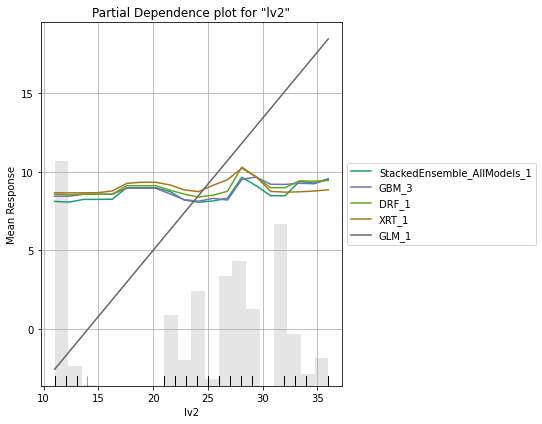

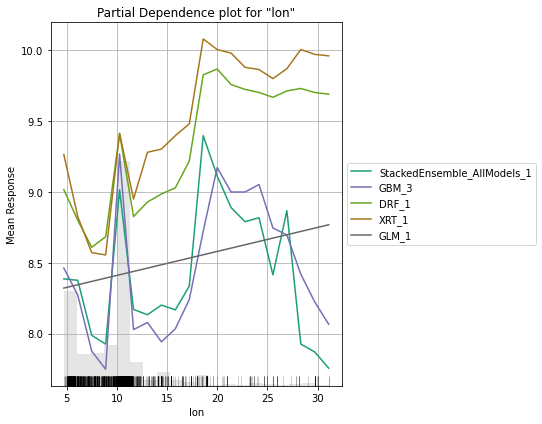

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

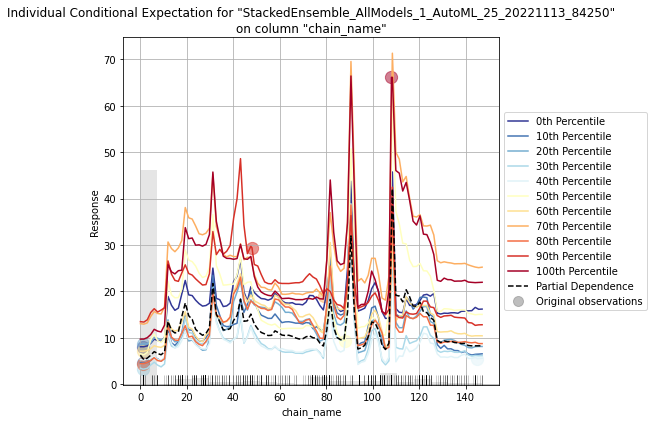

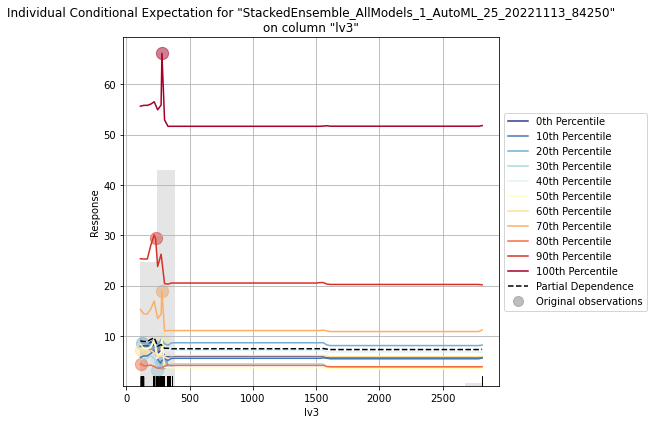

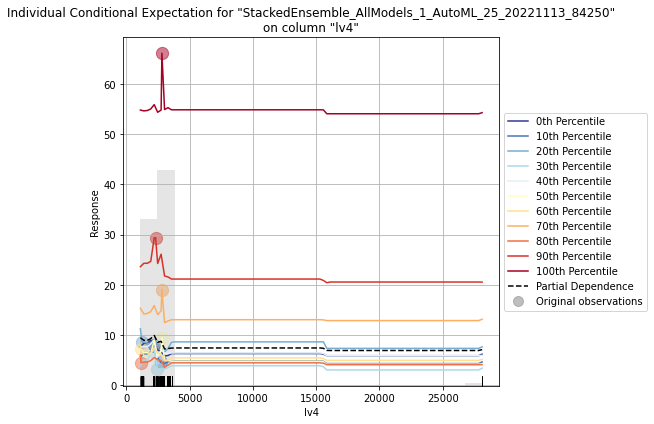

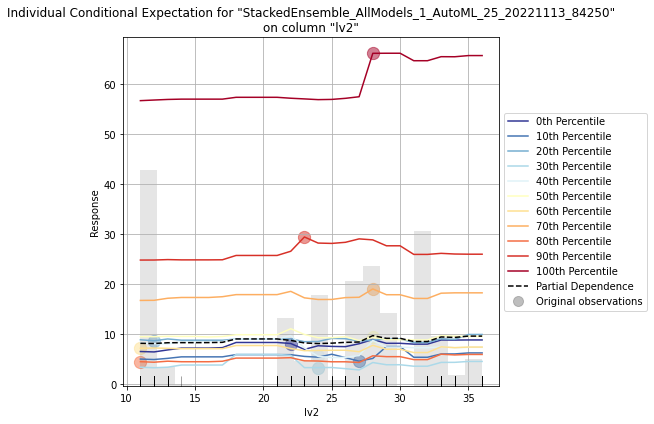

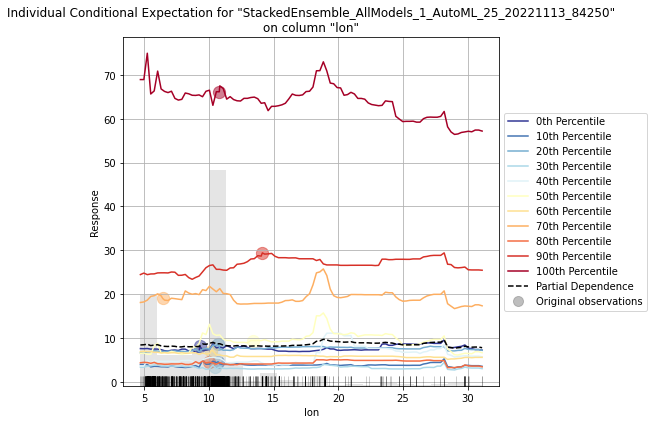

In [47]:
#explain_model = model.explain(frame = test, figsize = (8,6))

In [25]:
# from h2o.model.regression import h2o_mean_squared_error

# h2o_mean_squared_error(y_truth, y_pred)

In [26]:
# y_pred.min()

In [27]:
# y_truth.min()

In [28]:
# y_pred.max()

In [29]:
# y_truth.max()

In [30]:
y_pred = 10**(y_pred/10000)
y_pred 

In [31]:
y_truth = 10**(y_truth/10000)
y_truth

In [32]:
# y_pred.min()

In [33]:
# y_truth.min()

In [34]:
# y_pred.max()

In [35]:
# y_truth.max()

In [36]:
# stores_test = pd.read_csv('data/stores_test_preprocessed.csv')

In [37]:
# stores_test.isnull().sum()

In [38]:
# stores_test['grunnkrets_population'] = stores_test['grunnkrets_population'].fillna(stores_test.grunnkrets_population.mean())
# stores_test['district_population'] = stores_test['district_population'].fillna(stores_test.district_population.mean())
# stores_test['area_km2'] = stores_test['area_km2'].fillna(stores_test.area_km2.mean())

In [39]:
# stores_test.isnull().sum()

In [40]:
# stores_test_id = stores_test.drop(stores_test.iloc[:,1:], axis = 1)
# stores_test_id

In [41]:
# stores_test = stores_test.drop(['store_id'], axis = 1)

In [42]:
# stores_test.head()

In [43]:
#test_data = h2o.H2OFrame(stores_test)

In [44]:
# y_pred_test = model.predict(test_data)
# y_pred_test

In [45]:
# y_pred_test_non_log = 10**(y_pred_test/10000)
# y_pred_test_non_log

In [46]:
#h2o.export_file(y_pred_test, path = "data/pred09.csv", force = True)